# Plot quantiles of standardized residuals from validation for all methods, months, and regions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(
    context="notebook", style="whitegrid", font_scale=1.5, rc={"lines.markersize": 10}
)


In [2]:
blocks = ["b1", "b2"]
months = ["02", "04", "07", "10"]

cv_quantiles = []
for block in blocks:
    for month in months:
        df = pd.read_csv(
            f"../data/intermediate/models/2021{month}/validation_ratio_quantiles_{block}.csv", index_col=0
        )
        df["Month"] = f"2021{month}"
        df["Region"] = block
        cv_quantiles.append(df)

df_quantiles = pd.concat(cv_quantiles, axis=0).reset_index(drop=True)
# df_quantiles_b1 = df_quantiles[df_quantiles["Region"] == "b1"].drop(columns="Region")
# df_quantiles_b2 = df_quantiles[df_quantiles["Region"] == "b2"].drop(columns="Region")

df_quantiles


,sample,theoretical,Method,Month,Region
0,-2.564994,-2.976515,Trend surface,202102,b1
1,-2.411715,-2.757142,Trend surface,202102,b1
2,-2.253925,-2.621812,Trend surface,202102,b1
3,-2.159269,-2.522216,Trend surface,202102,b1
4,-2.103336,-2.442715,Trend surface,202102,b1
...,...,...,...,...,...
15784,2.397274,2.454594,Cokriging,202110,b2
15785,2.606840,2.533794,Cokriging,202110,b2
15786,2.756662,2.633033,Cokriging,202110,b2
15787,2.838058,2.767907,Cokriging,202110,b2


In [3]:
def draw_ref_line(**kwargs):
    plt.axline(xy1=[0, 0], slope=1, linestyle="dotted", linewidth=2, color="black", zorder=0)


def plot_quantiles(df: pd.DataFrame):
    palette = ["#d95f02", "#1b9e77", "#7570b3"]
    methods = ["Trend surface", "Kriging", "Cokriging"]

    facet = sns.relplot(
        data=df,
        x="theoretical",
        y="sample",
        hue="Method",
        hue_order=methods,
        palette=palette,
        col="Region",
        col_wrap=2,
        edgecolor="face",
        alpha=0.4,
        aspect=1,
        facet_kws={"despine": False, "sharey": True},  # "xlim": (-4, 4), "ylim": (-4, 4)},
    )
    facet.map(draw_ref_line)
    facet.set_xlabels("Standard Gaussian quantiles")
    facet.set_ylabels("Standardized residuals")

    # year_month = [f"2021-{month}" for month in months]
    region_name = ["Corn Belt", "Cropland"]
    for month, axes in zip(region_name, facet.axes.flatten()):
        axes.set_title(month)


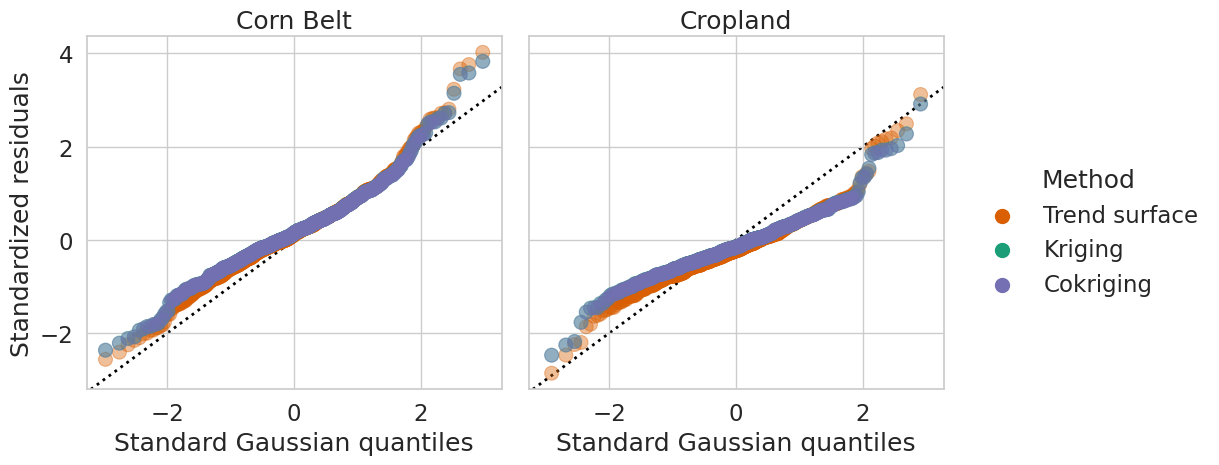

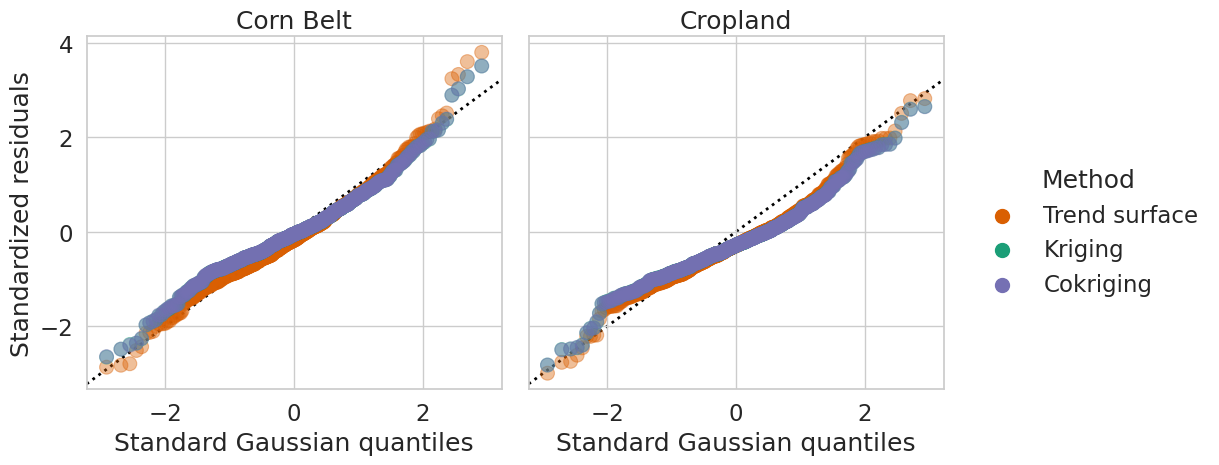

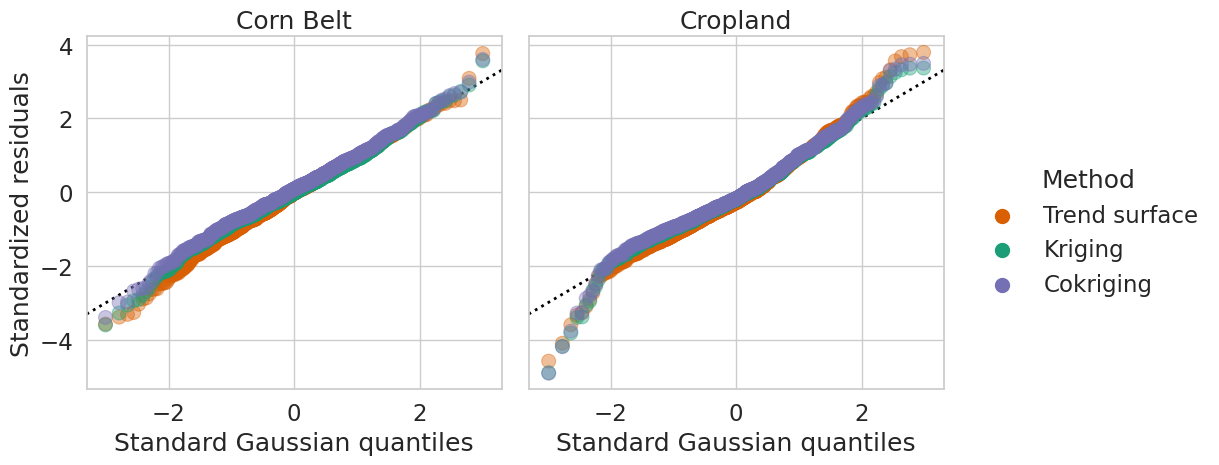

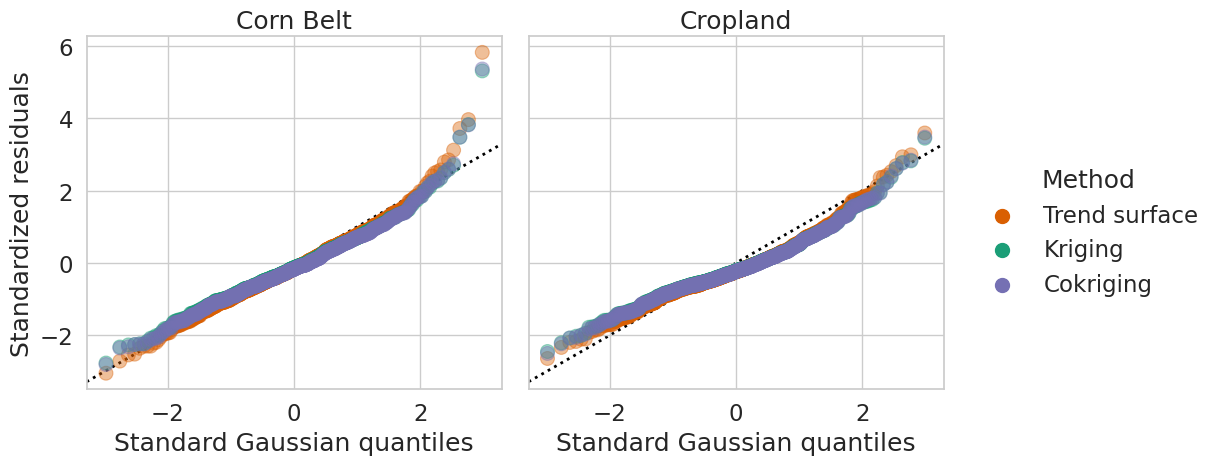

In [8]:
for month, df_month in df_quantiles.groupby("Month"):
    plot_quantiles(df_month)
    plt.savefig(
        f"../figures/cv_quantiles_{month}.jpeg",
        dpi=200,
        bbox_inches="tight",
    )


In [5]:
# plot_quantiles(df_quantiles_b1)

# plt.savefig(
#     f"../figures/cv_quantiles_b1.pdf",
#     dpi=300,
#     bbox_inches="tight",
# )


In [6]:
# plot_quantiles(df_quantiles_b2)

# plt.savefig(
#     f"../figures/cv_quantiles_b2.pdf",
#     dpi=300,
#     bbox_inches="tight",
# )
